In [1]:
%matplotlib inline

In [1]:
# Required Libraries
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load and parse the JSON file
# Load story likes data
with open("story_likes.json", "r") as file:
    story_data = json.load(file)

# Flatten into a list of (user, timestamp) tuples
flattened_likes = []
for entry in story_data["story_activities_story_likes"]:
    user = entry["title"]
    for item in entry["string_list_data"]:
        timestamp = item["timestamp"]
        flattened_likes.append((user, timestamp))

# Convert to DataFrame
likes_df = pd.DataFrame(flattened_likes, columns=["user", "timestamp"])

In [3]:
# Clean and prep data
# Count how many times each user appears (how many stories I liked from them)
like_counts = likes_df["user"].value_counts()

# Filter to users I liked stories from more than once
frequent_users = like_counts[like_counts > 1].index
filtered_likes_df = likes_df[likes_df["user"].isin(frequent_users)]

# Sort by timestamp to simulate viewing/liking sequence
filtered_likes_df = filtered_likes_df.sort_values("timestamp").reset_index(drop=True)

In [4]:
# Create edges for network graph
# Make edges between users whose stories I liked consecutively
edges = []
for i in range(len(filtered_likes_df) - 1):
    user1 = filtered_likes_df.loc[i, "user"]
    user2 = filtered_likes_df.loc[i + 1, "user"]
    if user1 != user2:
        edges.append((user1, user2))

In [7]:
# Build and analyze the network
# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
centrality_df = pd.DataFrame(degree_centrality.items(), columns=["user", "degree_centrality"])
top_nodes = centrality_df.sort_values("degree_centrality", ascending=False).head(5)
print(top_nodes)

               user  degree_centrality
15      anika.g1006           0.636364
0        hhhailey_m           0.590909
14   rachmdonaldson           0.500000
4   melanie.c.young           0.500000
2       callmecraig           0.454545


/tmp/ipykernel_6727/125711964.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


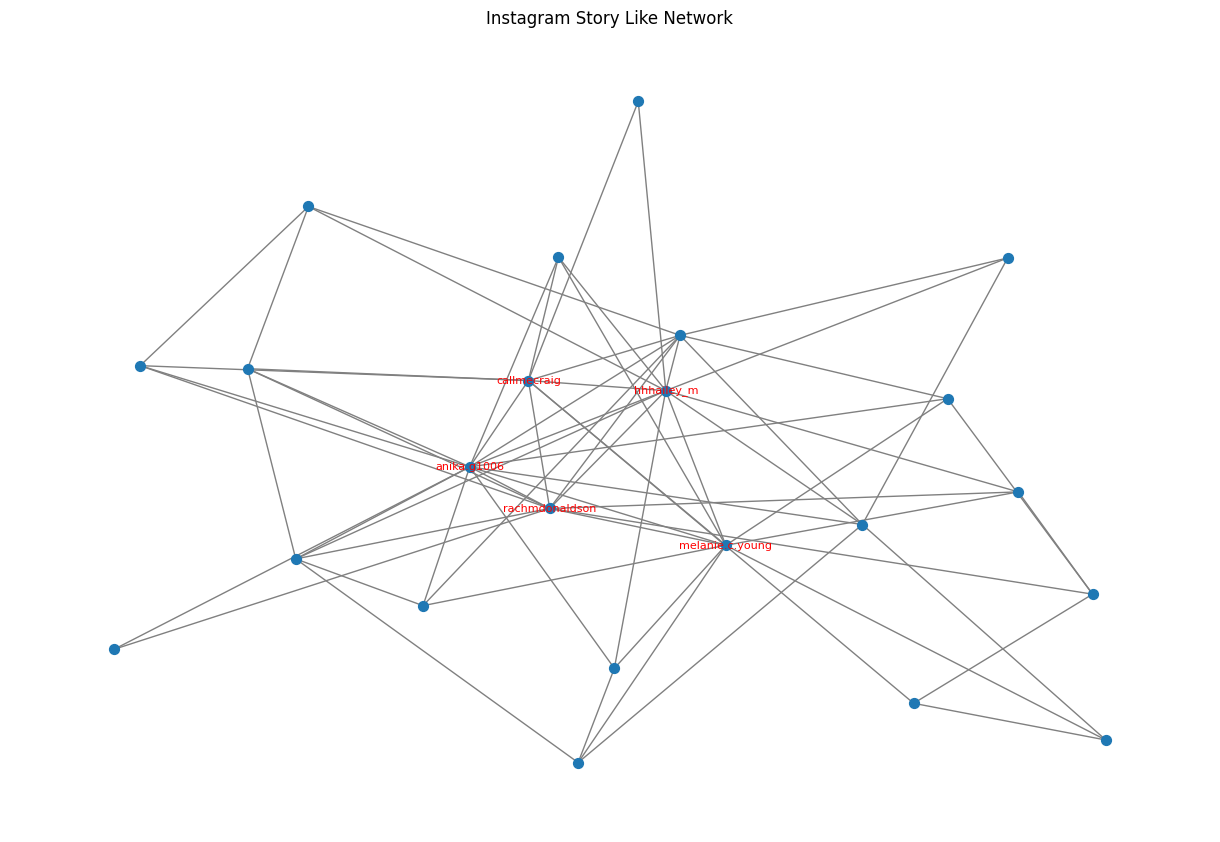

In [6]:
# Visualize the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw entire network
nx.draw(G, pos, with_labels=False, node_size=50, edge_color="gray")

# Label top 5 most central users in red
top_labels = {user: user for user in top_nodes["user"]}
nx.draw_networkx_labels(G, pos, labels=top_labels, font_size=8, font_color="red")

plt.title("Instagram Story Like Network")
plt.axis("off")
plt.tight_layout()
plt.show()